In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

train = pd.read_excel("corpustrain.xlsx")
test = pd.read_excel("corpustest.xlsx")

In [2]:
display(train.shape)
display(test.shape)

(676, 7)

(295, 7)

Junto mis dataframe para limpiar de manera mas facil

In [3]:
train['source']='train'
test['source']='test'

In [4]:
data = pd.concat([train, test],ignore_index=True,sort=True)
print (train.shape, test.shape, data.shape)

(676, 8) (295, 8) (971, 8)


En este caso el dataframe las columnas que me enfocare son titulo y texto

In [5]:
display(data)

,Category,Headline,Id,Link,Source,Text,Topic,source
0,Fake,"RAE INCLUIRÁ LA PALABRA ""LADY"" EN EL DICCIONAR...",1,http://www.elruinaversal.com/2017/06/10/rae-in...,El Ruinaversal,"RAE INCLUIRÁ LA PALABRA ""LADY"" EN EL DICCIONAR...",Education,train
1,Fake,"La palabra ""haiga"", aceptada por la RAE",2,https://haynoticia.es/la-palabra-haiga-aceptad...,Hay noticia,"La palabra ""haiga"", aceptada por la RAE La Rea...",Education,train
2,Fake,YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...,3,http://www.elruinaversal.com/2018/05/06/yordi-...,El Ruinaversal,YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...,Education,train
3,True,UNAM capacitará a maestros para aprobar prueba...,4,http://www.eluniversal.com.mx/articulo/nacion/...,EL UNIVERSAL,UNAM capacitará a maestros para aprobar prueba...,Education,train
4,Fake,pretenden aprobar libros escolares con conteni...,5,https://redaccion.lamula.pe/2018/06/19/memoria...,Lamula,Alerta: pretenden aprobar libros escolares con...,Education,train
...,...,...,...,...,...,...,...,...
966,True,Meryl Streep disfrutó unos premios Oscar tan m...,291,https://www.huffingtonpost.com.mx/2018/03/06/m...,HUFFPOST,Meryl Streep disfrutó unos premios Oscar tan m...,Entertainment,test
967,Fake,EL PLAGIO DE LANA DEL REY A RADIOHEAD FUE ACOR...,292,http://lavozpopular.com/plagio-lana-del-rey-ra...,La voz popular,EL PLAGIO DE LANA DEL REY A RADIOHEAD FUE ACOR...,Entertainment,test
968,True,Ricardo Arjona lanza una serie documental por ...,293,http://www.billboard.com.ar/noticia/2980/ricar...,Billboard,Ricardo Arjona lanza una serie documental por ...,Entertainment,test
969,True,Raúl Araiza sorprende a Andrea Legarreta con b...,294,http://www.eluniversal.com.mx/espectaculos/rau...,EL UNIVERSAL,Raúl Araiza sorprende a Andrea Legarreta con b...,Entertainment,test


# Limpieza de datos

Elimino columnas que no me aportan segun lo antes visto

In [6]:
data = data.drop(['Headline','Link','Id','Source','Topic'],axis=1)


#### Ya que en este datafrmae el titulo y el cuerpo de la ntoicia estan juntos es por eso que elimino el "Headline"

In [7]:
data.head(5)

,Category,Text,source
0,Fake,"RAE INCLUIRÁ LA PALABRA ""LADY"" EN EL DICCIONAR...",train
1,Fake,"La palabra ""haiga"", aceptada por la RAE La Rea...",train
2,Fake,YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...,train
3,True,UNAM capacitará a maestros para aprobar prueba...,train
4,Fake,Alerta: pretenden aprobar libros escolares con...,train


Ordeno los header de las columnas para que esten mas ordenados

In [8]:
data = data[['Text','Category','source']]


In [9]:
data.head(5)

,Text,Category,source
0,"RAE INCLUIRÁ LA PALABRA ""LADY"" EN EL DICCIONAR...",Fake,train
1,"La palabra ""haiga"", aceptada por la RAE La Rea...",Fake,train
2,YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...,Fake,train
3,UNAM capacitará a maestros para aprobar prueba...,True,train
4,Alerta: pretenden aprobar libros escolares con...,Fake,train


In [10]:
print('Dataframe para mi modelo ')
display(data.head(5))
print(data.shape,'<--- Cantidad de filas y columnas contando pruebas y test luego los separare')


Dataframe para mi modelo 


,Text,Category,source
0,"RAE INCLUIRÁ LA PALABRA ""LADY"" EN EL DICCIONAR...",Fake,train
1,"La palabra ""haiga"", aceptada por la RAE La Rea...",Fake,train
2,YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...,Fake,train
3,UNAM capacitará a maestros para aprobar prueba...,True,train
4,Alerta: pretenden aprobar libros escolares con...,Fake,train


(971, 3) <--- Cantidad de filas y columnas contando pruebas y test luego los separare


Verifico si tengo datos nulos

In [11]:
print('Dataframe para mi modelo ')
display(data.apply(lambda x: sum(x.isnull())))
print('Dataframe para mis pruebas')
display(data.apply(lambda x: sum(x.isnull())))

Dataframe para mi modelo 


Text        0
Category    0
source      0
dtype: int64

Dataframe para mis pruebas


Text        0
Category    0
source      0
dtype: int64

Remplazo mi variable objetivo por 0 y 1 

In [12]:
data['Category'] = data['Category'].replace(['Fake','True'],[0,1])

In [13]:
data.head(5)

,Text,Category,source
0,"RAE INCLUIRÁ LA PALABRA ""LADY"" EN EL DICCIONAR...",0,train
1,"La palabra ""haiga"", aceptada por la RAE La Rea...",0,train
2,YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...,0,train
3,UNAM capacitará a maestros para aprobar prueba...,1,train
4,Alerta: pretenden aprobar libros escolares con...,0,train


Antes de definir mis variables a trabajar separo los dataframe de test y train que anteriormente junte

In [14]:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [15]:
# X = data['Text']
# y = data['Category']


In [16]:
X = train['Text']
y = train['Category']
X_t = test['Text']
y_t = test['Category']

In [17]:
sin_limpiar = X[0]

In [18]:
from nltk.corpus import stopwords
import string

stop = set(stopwords.words('spanish'))
punctuation = list(string.punctuation)
stop.update(punctuation)

def limpiar_stopwrods(dataframe):
    texto_limpio = []
    for i in dataframe.split():
        # Si la cadena de texto no esta en la stopwords(stop)
        #Entonces mando la cadena de texto sin las stopwords          
        if i.strip().lower() not in stop:
            texto_limpio.append(i.strip())
    return " ".join(texto_limpio)
X = X.apply(limpiar_stopwrods)
X_t = X_t.apply(limpiar_stopwrods)

In [19]:
limpio = X[0]

Metodo que cree para ver si efectivamente se limpio de stopwords el texto

In [20]:
# Paso a lista mis stopwords
stw = list(stop)
str1 = sin_limpiar
str2 = limpio
# Texto con stopwords

def verificar_texto_limpio(texto1,texto2):
    count1=0
    print('Texto con stopwords')
    for i in stw:
        if i in list(texto1.split(" ")):
            print(i)
            count1+=1
    print('Stop words encontradas sin limpiar ',count1)
    #Texto sin stopwords
    print('Texto sin stopwords')
    count2=0
    for i in stw:
        if i in list(texto2.split(" ")):
            print(i)
            count2+=1
    print('Stop words encontradas limpio: ',count2)



In [21]:
verificar_texto_limpio(str1,str2)

Texto con stopwords
por
ya
tuvo
nos
lo
quien
un
o
a
sus
han
fue
para
sea
que
la
tienen
sin
con
y
todos
una
de
en
será
uno
el
esta
los
es
del
cual
tiene
como
otro
pero
también
este
sería
le
las
su
se
no
Stop words encontradas sin limpiar  44
Texto sin stopwords
Stop words encontradas limpio:  0


In [22]:
print('Contenido a trabajar:')
display(X)
print('Mis labels:')
display(y)

Contenido a trabajar:


0      RAE INCLUIRÁ PALABRA "LADY" DICCIONARIO IDIOMA...
1      palabra "haiga", aceptada RAE Real Academia Le...
2      YORDI ROSADO ESCRIBIRÁ DISEÑARÁ NUEVOS LIBROS ...
3      UNAM capacitará maestros aprobar prueba Pisa m...
4      Alerta: pretenden aprobar libros escolares con...
                             ...                        
671    Madonna nueva imagen Chocolate Abuelita partir...
672    Filtran material íntimo Zelina Vega, luchadora...
673    CBS PLANEA GRAN HERMANO CASA BLANCA TRUMP OPRA...
674    TV Azteca anuncia cambiará nombre nacionalista...
675    MUERTE PETER ANGUILA SOBREDOSIS Peter Anguila,...
Name: Text, Length: 676, dtype: object

Mis labels:


0      0
1      0
2      0
3      1
4      0
      ..
671    0
672    1
673    0
674    0
675    0
Name: Category, Length: 676, dtype: int64

# Preprocesamiento de datos

### Ya que mi dataframe venia separado de train y test no tengo necesida de usar train test split


In [23]:
# from sklearn.model_selection import train_test_split

# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train = X
X_test = X_t
y_train = y
y_test = y_t

In [24]:
X_test

676    MAESTRA *NUMBER* AÑOS RELACIONES ALUMNO *NUMBE...
677    Oxford lanza propios exámenes certificación ni...
678    RAE estudia incluir «machirulo» Diccionario ac...
679    Malala Yousafzai anuncia estudiará Oxford nobe...
680    Nombran Ricardo Arjona nuevo miembro Real Acad...
                             ...                        
966    Meryl Streep disfrutó premios Oscar tan mexica...
967    PLAGIO LANA REY RADIOHEAD ACORDADO AMBOS Lana ...
968    Ricardo Arjona lanza serie documental YouTube ...
969    Raúl Araiza sorprende Andrea Legarreta beso bo...
970    Adal Ramones protagonizará remake Chavo Ocho C...
Name: Text, Length: 295, dtype: object

#### Recordatorio 
<img src="tfmodelo.png">

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(stop_words = stopwords.words("spanish"))
X_train_transformado = tfidf_vect.fit_transform(X_train)
X_test_transformado = tfidf_vect.transform(X_test)
tfidf_df = pd.DataFrame(X_train_transformado.A, columns=tfidf_vect.get_feature_names())

#### Recordatorio 
<img src="tfmodelo.png">

In [26]:

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score,roc_curve,roc_auc_score
import matplotlib.pyplot as plt

MNB = MultinomialNB() 
# Le entrego los datos a mi modelo 
MNB.fit(X_train_transformado, y_train)                     
pred = MNB.predict(X_test_transformado)                     
score = metrics.accuracy_score(y_test, pred)



In [27]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
MNB_f1 = round(f1_score(y_test, pred, average='weighted'), 3)
MNB_accuracy = round((accuracy_score(y_test, pred)*100),2)

print("Precision : " , MNB_accuracy , " %")
print("f1_score : " , MNB_f1)


              precision    recall  f1-score   support

           0       0.79      0.59      0.68       142
           1       0.69      0.86      0.77       153

    accuracy                           0.73       295
   macro avg       0.74      0.72      0.72       295
weighted avg       0.74      0.73      0.72       295

[[ 84  58]
 [ 22 131]]
Precision :  72.88  %
f1_score :  0.723


In [28]:
probs_mnb = MNB.predict_proba(X_test_transformado)
probs_mnb = probs_mnb[:, 1]
auc = roc_auc_score(y_test, probs_mnb)  
print('AUC: %.2f' % auc) 

AUC: 0.80


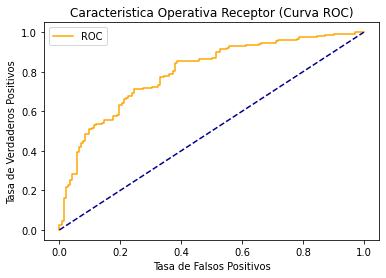

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, probs_mnb) 
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Caracteristica Operativa Receptor (Curva ROC)')
plt.legend()
plt.show()

In [30]:
X_test_transformado

<295x24494 sparse matrix of type '<class 'numpy.float64'>'
	with 39476 stored elements in Compressed Sparse Row format>

In [31]:
y_test

676    0
677    1
678    1
679    1
680    0
      ..
966    1
967    0
968    1
969    1
970    0
Name: Category, Length: 295, dtype: int64

# Randomforest

In [32]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
RFC.fit(X_train_transformado, y_train)
y_pred_rfc = RFC.predict(X_test_transformado)

print(classification_report(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))

RFC_f1 = round(f1_score(y_test, y_pred_rfc, average='weighted'), 3)
RFC_accuracy = round((accuracy_score(y_test, y_pred_rfc)*100),2)

print("Accuracy : " , RFC_accuracy , " %")
print("f1_score : " , RFC_f1)


              precision    recall  f1-score   support

           0       0.73      0.89      0.80       142
           1       0.87      0.70      0.78       153

    accuracy                           0.79       295
   macro avg       0.80      0.79      0.79       295
weighted avg       0.80      0.79      0.79       295

[[126  16]
 [ 46 107]]
Accuracy :  78.98  %
f1_score :  0.788


In [33]:
probs_rfc = RFC.predict_proba(X_test_transformado)
probs_rfc = probs_rfc[:, 1]
auc = roc_auc_score(y_test, probs_rfc)  
print('AUC: %.2f' % auc) 

AUC: 0.87


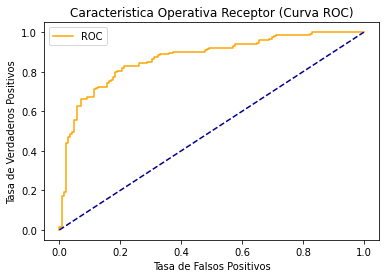

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, probs_rfc) 
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Caracteristica Operativa Receptor (Curva ROC)')
plt.legend()

##### EL modelo en español al  parecer sufre de underfitting, pero se solcuona simplemente entregandole mas datos

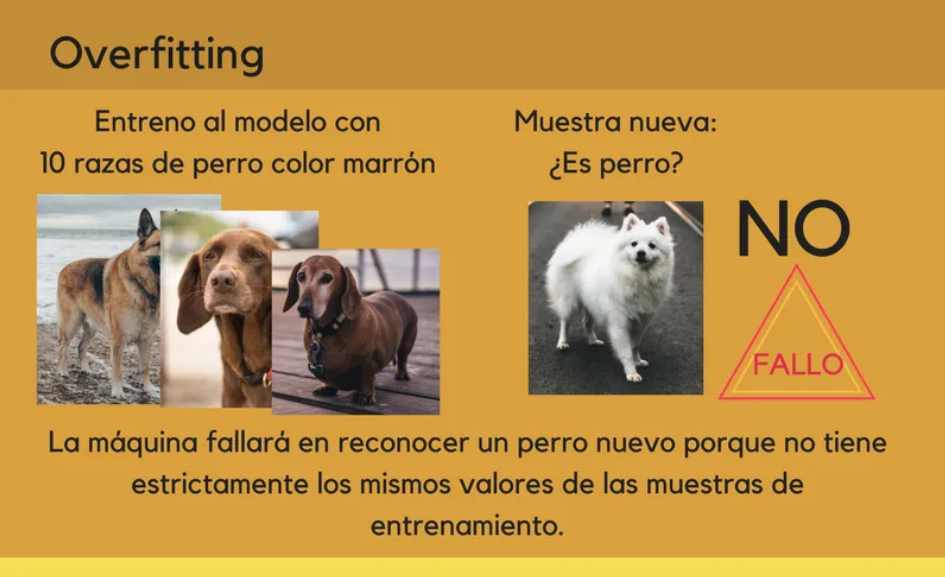

In [35]:
import pickle

nombre_archivo = 'randomforestEspanol.sav'
pickle.dump(RFC, open(nombre_archivo, 'wb'))



In [36]:
nombre_archivo_ds = 'stringtomatrizEspanol.sav'
pickle.dump(tfidf_vect, open(nombre_archivo_ds, 'wb'))


In [37]:
loaded_model = pickle.load(open(nombre_archivo, 'rb'))
load_model_matriz = pickle.load(open(nombre_archivo_ds, 'rb'))

In [38]:
# una_noticia.to_excel("noticiasFalsasIngles.xlsx") 

In [39]:
display(X_t[676])

'MAESTRA *NUMBER* AÑOS RELACIONES ALUMNO *NUMBER* DARÁ EDUCACIÓN SEXUAL CONALEP Unidos.- Luego revelará caso maestra estadounidense *NUMBER* años nombre Alexandria Vera acusada abusar alumno *NUMBER* años (con noviazgo incluso quedó embarazada), juez analizó situación finalmente determinó profesora encarcelada si deberá pagar multa USD*NUMBER* mil dólares, alejarse adolescente siempre, dar servicio comunitario *NUMBER* horas profesora CONALEP Ciudad México. juez señala chico involucrado confesó "tuvo relaciones consentimiento" además papás aprobaban noviazgo: "Es caso llamó atención medios internacionales *NUMBER* atractiva, joven apenas *NUMBER* años. juez iba determinar castigo sentía presión muchas personas querían metiera cárcel maestra, embargo ser objetivo: propio joven padres pidieron dejara libertad. Además verdad recordé etapa secundaria compañeros fantaseábamos maestras (risas), así pensé, ¿por ser tan severo si alguna vez fantasía chicos?. Decidí Alexandria pisará cárcel cas

In [40]:
type(X_t)


pandas.core.series.Series

In [41]:
noticia = 'Francisco Sagasti nuevo presidente interino Perú parlamento eligió mesa directiva luego Manuel Merino renunciara días haber tomado presidencia país, medio masivas manifestaciones calles dejaron dos jóvenes muertos. tarde, Congreso Perú definió 97 votos favor, 26 0 abstenciones mesa directiva liderada Francisco Sagasti, presidente interino país próximas elecciones abril 2021.Esto, luego Manuel Merino (Acción Popular) renunciara presidencia peruana domingo, cinco días haber tomado puesto, luego parlamento declarara vacancia Martín Vizcarra “incapacidad moral” presuntamente haber recibido sobornos gobernador Moquegua (2011-2014).El legislador Francisco Sagasti (76 años) militante Partido Morado, centro-liberal, mandatario transición medio grave crisis política social llevó masivas protestas ciudadanas, muertos dos jóvenes Lima.Lee también: Amnistía Internacional denuncia uso excesivo fuerza parte policía peruanaEl ingeniero industrial ex asesor Banco Mundial elegido Legislativo presidir mesa directiva y, consecuencia, asumirá proceso sucesión presidencial establecido Constitución, establece titular poder asume Presidencia mandatario.La lista parlamentarios conformar lista mesa directiva conformada congresistas firmaron moción vacancia Vizcarra, terminó destitución.A Sagasti acompañan mesa Mirtha Vásquez (Frente Amplio), Luis Roel (Acción Popular) Matilde Fernández (Somos Perú). Vásquez asumirá cabeza parlamento.'

In [42]:
testdta = pd.Series([noticia])

In [43]:
a_predecir = load_model_matriz.transform(X_t)
a_predecir_test = load_model_matriz.transform(testdta)

In [44]:
a_predecir

<295x24494 sparse matrix of type '<class 'numpy.float64'>'
	with 39476 stored elements in Compressed Sparse Row format>

In [45]:
tes = loaded_model.predict(a_predecir)

In [46]:
test_t = loaded_model.predict(a_predecir_test)

In [47]:
test_t[0]

1

In [48]:
for i in tes:
    print(i)

0
1
0
0
0
1
0
0
1
1
1
0
0
1
1
1
1
1
0
1
0
0
1
1
0
0
0
1
1
1
0
0
1
0
0
1
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
1
0
0
1
1
0
0
0
0
0
1
0
1
1
0
1
1
1
1
1
1
0
0
0
0
1
1
1
1
0
0
1
0
0
0
0
0
1
0
1
0
1
1
1
1
0
0
0
1
0
1
1
1
1
1
1
1
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
1
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
1
1
0
1
1
0
1
0
1
0
1
1
1
0
0
1
1
0
0
1
0
1
1
0
1
1
1
1
0
1
1
0
0
0
0
1
0
0
1
0
1
0
1
1
1
1
1
0
1
0
1
1
1
0
0
1
1
1
0
1
1
0
0
0
0
0
0
0
1
1
1
1
0
1
1
0
0
0
1
1
1
0
0
0
1
1
0
0
1
1
0
1
0
0
1
0
0
0
0
1
0
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0


In [49]:
import numpy
import sklearn
import threadpoolctl
import joblib
import scipy
import nltk
print('sklearn',sklearn.__version__)
print('Pandas',pd.__version__)
print('threadpoolctl',threadpoolctl.__version__)
print('Numpy',numpy.__version__)
print('joblib',joblib.__version__)
print('scipy',scipy.__version__)
print('nltk',nltk.__version__)

sklearn 0.23.2
Pandas 1.1.3
threadpoolctl 2.1.0
Numpy 1.19.2
joblib 0.17.0
scipy 1.5.2
nltk 3.5
